In [1]:
import xarray as xr
import xnemogcm as xn
import cftime._cftime as cft
import dask.config

from pathlib import Path

## Daily output of 10 day simulation

In [21]:
datadir   = Path("/data/dkamm/nemo_output/NEVERWORLD/example_romain")

In [22]:
domcfg = xn.open_domain_cfg(datadir=datadir)

In [23]:
ds = xn.open_nemo(domcfg=domcfg, datadir=datadir)

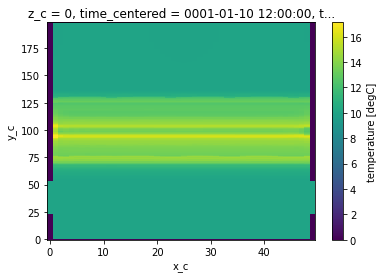

In [24]:
ds.toce.isel(z_c=0,t=-1).plot()

## Yearly output of 50y simulation

In [33]:
datadir   = Path("/data/dkamm/nemo_output/NEVERWORLD/1_deg_GM/restart5")

In [34]:
ds = xn.open_nemo(
    domcfg=domcfg, files=[
        datadirL / 'NEVERWORLD_grid_T.nc',
        datadirL / 'NEVERWORLD_grid_U.nc',
        datadirL / 'NEVERWORLD_grid_V.nc',
        datadirL / 'NEVERWORLD_grid_W.nc'
    ]
)

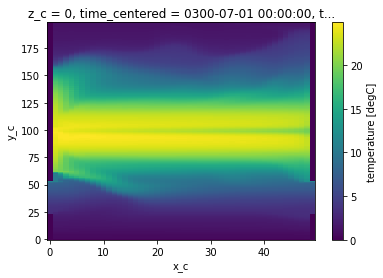

In [35]:
ds.toce.isel(z_c=0,t=-1).plot()

## Yearly output of 3D fields and monthly output of 2D fields of 50y simulation

In [36]:
datadir   = Path("/data/dkamm/nemo_output/NEVERWORLD/1_deg_GM/restart5")

In [37]:
ds = xn.open_nemo(
    domcfg=domcfg, files=[
        datadir / 'NEVERWORLD_grid_T.nc',
        datadir / 'NEVERWORLD_grid_U.nc',
        datadir / 'NEVERWORLD_grid_V.nc',
        datadir / 'NEVERWORLD_grid_W.nc',
        datadir / 'NEVERWORLD_grid_T_mo.nc',
    ]
)

/home/dkamm/.conda/envs/xgcm/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/dkamm/.conda/envs/xgcm/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/dkamm/

## My workaround was:

In [38]:
import dask.config
dask.config.set({'array.slicing.split_large_chunks': True})

In [39]:
ds = xn.open_nemo(
    domcfg=domcfg, files=[
        datadir / 'NEVERWORLD_grid_T.nc',
        datadir / 'NEVERWORLD_grid_U.nc',
        datadir / 'NEVERWORLD_grid_V.nc',
        datadir / 'NEVERWORLD_grid_W.nc',
        datadir / 'NEVERWORLD_grid_T_mo.nc',
    ]
)

## But then it filled the fields with NANs

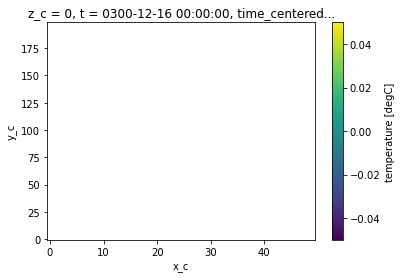

In [40]:
ds.toce.isel(z_c=0,t=-1).plot()